In [1]:
!pip install --pre pycaret


In [2]:
!pip install interpret


In [47]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.6 MB/s eta 0:00:00m eta 0:00:010:01:01m


In [49]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 5.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.8 MB/s eta 0:00:00


In [3]:
from pycaret.utils import version
version()

'3.0.0.rc4'

In [50]:
# ----------------------------------GENERAL---------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# ----------------------------------VISUALIZATION---------------------------

from IPython.display import Image # I-Python For allowing user to display images in notebooks
import seaborn as sns # Visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import scikitplot as skplt
import matplotlib.pyplot as plt # Importation of pyplot sub-library from Matplotlib library

# ----------------------------------PRE-PROCESSING---------------------------

from sklearn.model_selection import train_test_split # Importation of Scikit-Learn library focused on Train Test Split method;
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PowerTransformer # Will make the probability distribution of a variable more Gaussian-like
from sklearn.preprocessing import RobustScaler
from sklearn.inspection import permutation_importance # Permutation Importance for feature selection approach
from sklearn.feature_selection import SelectKBest, f_classif # Select K best features for feature selection approach

# ----------------------------------PIPELINE AND MODELS----------------------

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score # Cross-Validation score
from sklearn.model_selection import cross_val_predict # Cross-Validation prediction
from sklearn.neighbors import KNeighborsClassifier # KNN for classification approach
from sklearn.naive_bayes import GaussianNB # NaiveBayes for classification approach - Gaussian
from sklearn.naive_bayes import BernoulliNB # NaiveBayes for classification approach - Bernouilli
from sklearn.svm import SVC # SVM with Radial Basis Function for classification approach
from sklearn.svm import LinearSVC # SVM Linear Kernel Support Vector for classification approach
from xgboost import XGBClassifier # XGBoost for classification approach
from catboost import CatBoostClassifier # CatBoost for classification approach
from sklearn.ensemble import RandomForestClassifier #  RandomForest for classification approach
from sklearn.ensemble import AdaBoostClassifier # AsaBoost for classification approach

plt.rcParams["figure.figsize"] = (10, 10)  # Change matplotlib Box Size
plt.rcParams["font.size"] = 14  # Change matplotlib Font Size
plt.style.use("fivethirtyeight")

In [5]:
df_events = pd.read_csv('/Users/rajendravrk/Olympic_Athletes_2022/Olympic_Athletes_2022/data/athlete_events.csv')
#df_noc = pd.read_csv('athlete_events.csv')

In [6]:
df_events.head(15)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [7]:
df_events['Height'].value_counts()

180.0    12492
170.0    11976
178.0    10708
175.0    10320
183.0     8284
         ...  
226.0        3
131.0        2
130.0        2
219.0        2
128.0        1
Name: Height, Length: 95, dtype: int64

In [9]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [87]:
cleaned_df=df_events.dropna()

In [88]:
cleaned_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0


and helpful abbreviations of NOC 

'SGP', 'Singapore'

'ROT', 'Refugee Olympic Athletes'

'UNK', 'Unknown'

'TUV', 'Tuvalu'

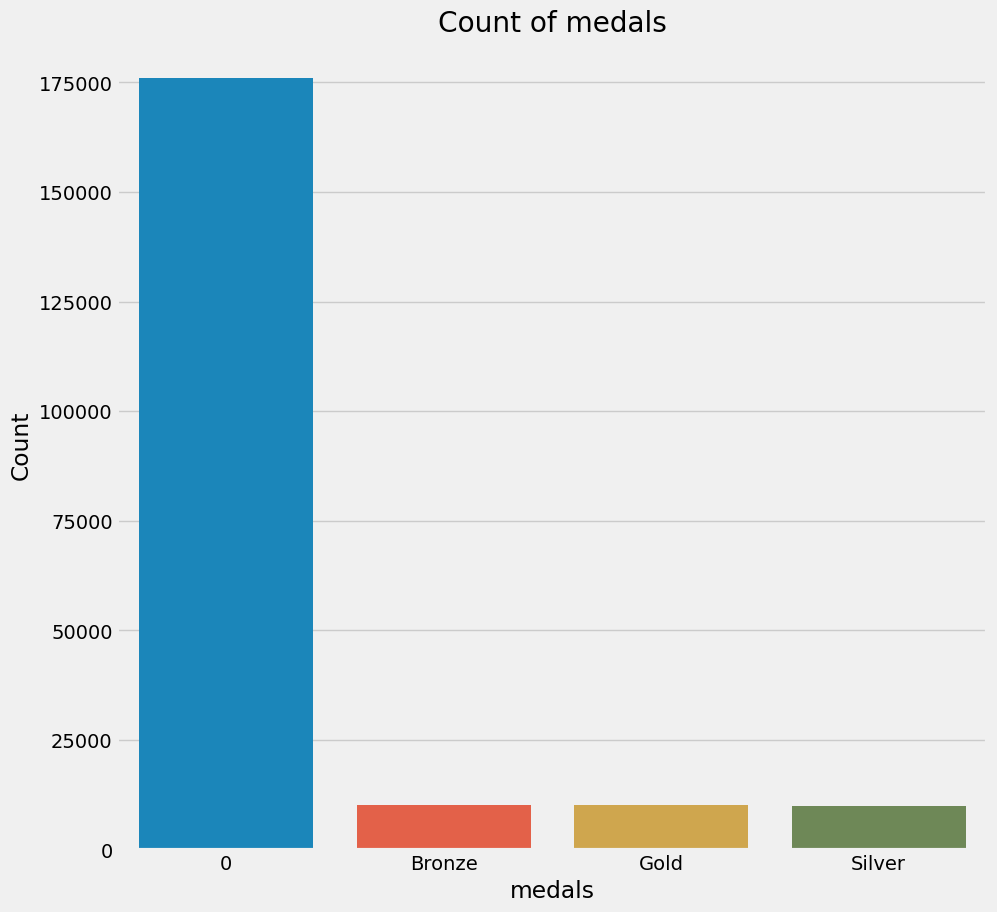

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title('Count of medals')
sns.countplot(x=cleaned_df['Medal'])
plt.xlabel('medals')
plt.ylabel('Count')
plt.show()

In [13]:



'''fig, ax = plt.subplots(2,1,figsize = (20, 10))
ax[0].boxplot(cleaned_df.iloc[:,0:17])
ax[1].boxplot(cleaned_df.iloc[:,17:34])
plt.show()'''

'fig, ax = plt.subplots(2,1,figsize = (20, 10))\nax[0].boxplot(cleaned_df.iloc[:,0:17])\nax[1].boxplot(cleaned_df.iloc[:,17:34])\nplt.show()'

In [91]:
cleaned_df['status'] =cleaned_df['Medal'].apply(lambda x: 0 if x==0  else 1)

In [15]:
cleaned_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,status
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0,0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0,0


In [90]:
cleaned_df['status'].value_counts()

0    175984
1     30181
Name: status, dtype: int64

In [92]:
cleaned_df['Year'] = cleaned_df['Year'].astype(str)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206165 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      206165 non-null  int64  
 1   Name    206165 non-null  object 
 2   Sex     206165 non-null  object 
 3   Age     206165 non-null  float64
 4   Height  206165 non-null  float64
 5   Weight  206165 non-null  float64
 6   Team    206165 non-null  object 
 7   NOC     206165 non-null  object 
 8   Games   206165 non-null  object 
 9   Year    206165 non-null  object 
 10  Season  206165 non-null  object 
 11  City    206165 non-null  object 
 12  Sport   206165 non-null  object 
 13  Event   206165 non-null  object 
 14  Medal   206165 non-null  object 
 15  status  206165 non-null  int64  
dtypes: float64(3), int64(2), object(11)
memory usage: 26.7+ MB


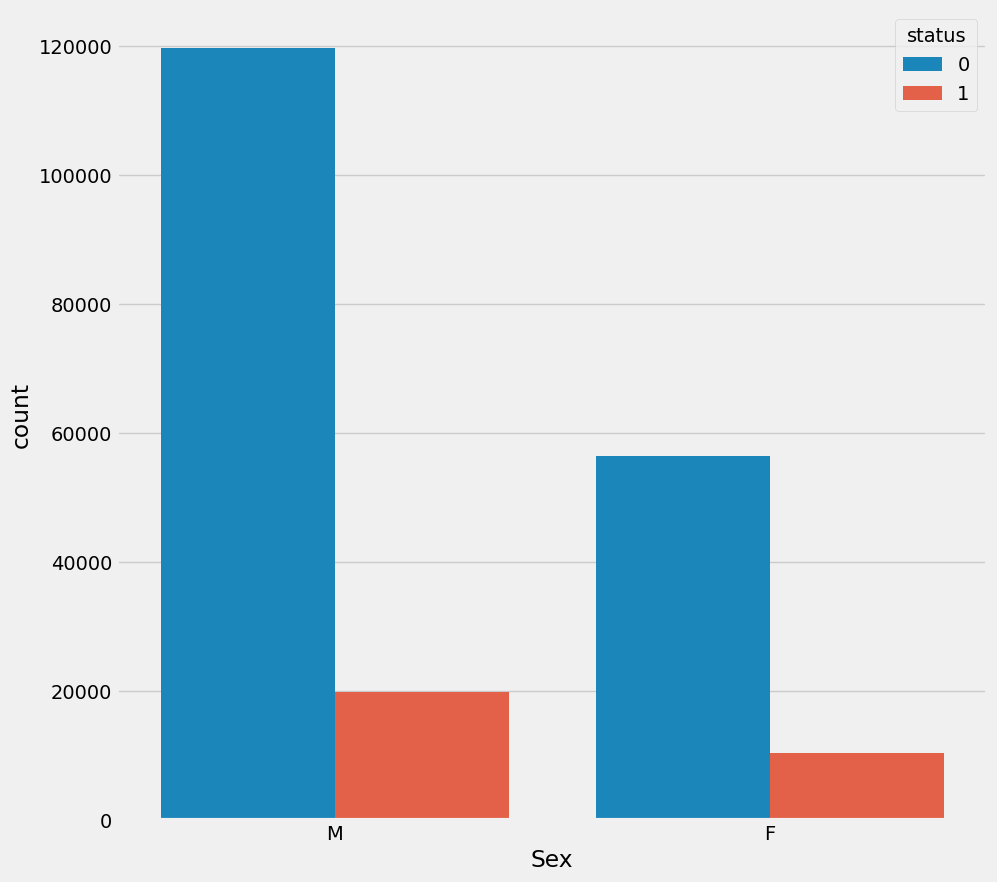

In [17]:
sns.countplot(x ='Sex', hue = "status", data = cleaned_df)
# Show the plot
plt.show()

In [ ]:
sns.boxplot(cleaned_df['Height'])

In [32]:
cleaned_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,status
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0,0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0,0


### Prepare Datasets

In [53]:
X = cleaned_df.drop(columns=['Medal','status','Name','ID','NOC','Games'], axis=1)
y = cleaned_df['status']
X.shape, y.shape

((206165, 10), (206165,))

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape

((164932, 10), (41233, 10), (164932,))

In [39]:
X_train.select_dtypes(include=["object"]).apply(lambda col: len(col.unique()))


Sex         2
Team      636
Year       35
Season      2
City       42
Sport      56
Event     585
dtype: int64

In [23]:
X_train['Team'].value_counts(normalize=True).head(20)


United States    0.066076
France           0.037713
Canada           0.037082
Great Britain    0.036633
Italy            0.035851
Japan            0.035693
Germany          0.034190
Australia        0.031910
Poland           0.027429
Sweden           0.025483
Soviet Union     0.023082
China            0.022894
Hungary          0.022518
Russia           0.022500
Finland          0.021312
Spain            0.020718
Switzerland      0.019141
South Korea      0.018165
Netherlands      0.017813
Romania          0.016419
Name: Team, dtype: float64

In [24]:
X_train['NOC'].value_counts(normalize=True).head(20)


USA    0.068513
FRA    0.038592
CAN    0.038464
GBR    0.037876
ITA    0.037106
JPN    0.036421
GER    0.035633
AUS    0.032456
POL    0.027757
SWE    0.025817
CHN    0.023773
URS    0.023658
RUS    0.023482
HUN    0.022609
FIN    0.021427
ESP    0.021021
SUI    0.020117
KOR    0.018668
NED    0.018013
ROU    0.016680
Name: NOC, dtype: float64

In [43]:
from pycaret.classification import *

reg = setup(data=pd.concat([X_train, y_train], axis=1),
            target = 'status',
            session_id=13,
            max_encoding_ohe=600, # columns with 600 or less categories will be One-hot encoded ELSE target encoding
            rare_to_value=0.0001, # Categories with less than 0.008 of the data will be grouped into a new category (Other)
            rare_value='Other',
            experiment_name='olympics',
            n_jobs=-1)

,Description,Value
0,Session id,13
1,Target,status
2,Target type,Binary
3,Original data shape,"(164932, 11)"
4,Transformed data shape,"(164932, 896)"
5,Transformed train set shape,"(115452, 896)"
6,Transformed test set shape,"(49480, 896)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,7


In [ ]:
best_model = compare_models(fold=5, sort='F1')


In [59]:
cleaned_df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,status
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0,0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0,0


Series([], Name: Team, dtype: object)

In [93]:
cleaned_df['Team'] = cleaned_df['Team'].apply(lambda x: 'Germany' if x == 'West Germany' else x)


In [94]:
cleaned_df['Team'] = cleaned_df['Team'].apply(lambda x: 'Germany' if x == 'East Germany' else x)


In [96]:
cleaned_dfcleaned_df['Team'].value_counts() == 1

United States                          13714
Germany                                12667
France                                  7807
Canada                                  7668
Great Britain                           7499
                                       ...  
Leipzig                                    1
St. Louis Southwest Turnverein #2-3        1
Turnverein Vorwrts, Cleveland              1
Paula                                      1
Digby                                      1
Name: Team, Length: 658, dtype: int64

In [97]:
cleaned_df['NOC'].value_counts()

USA    14214
FRA     7977
CAN     7965
GBR     7766
ITA     7697
       ...  
SAA        3
SSD        3
YMD        2
UAR        1
NFL        1
Name: NOC, Length: 226, dtype: int64

### **Baseline TRAINING Models:** K-Nearest Neighbours (KNN)

In [51]:
# Model Call:
knn = KNeighborsClassifier(n_neighbors=35)
# Pipeline Definition:
knn_pipe = Pipeline(steps=[("PT", PowerTransformer()), ("knn", knn)])

In [56]:
'''knn_score_TRAIN_set = np.mean(cross_val_score(knn_pipe, X_train, y_train, scoring="f1_macro", cv=4))
print("\nf1_macro Score obtained for TRAIN set is: %.2f%%" % (knn_score_TRAIN_set * 100.0))'''

'knn_score_TRAIN_set = np.mean(cross_val_score(knn_pipe, X_train, y_train, scoring="f1_macro", cv=4))\nprint("\nf1_macro Score obtained for TRAIN set is: %.2f%%" % (knn_score_TRAIN_set * 100.0))'

In [58]:
X_train.head()

,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event
144064,M,21.0,170.0,57.0,Norway,1960,Winter,Squaw Valley,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres
9494,M,23.0,186.0,82.0,Soviet Union,1976,Summer,Montreal,Rowing,Rowing Men's Coxless Fours
142664,M,38.0,173.0,85.0,Germany,1960,Summer,Roma,Shooting,"Shooting Men's Free Pistol, 50 metres"
81949,F,30.0,177.0,58.0,Mexico,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay
120202,F,18.0,169.0,58.0,Hungary,1972,Summer,Munich,Swimming,Swimming Women's 200 metres Individual Medley


In [57]:
knn_y_predict = cross_val_predict(knn_pipe, X_test, y_test, cv=4)

ValueError: could not convert string to float: 'F'